
# About this Data set

---

Besides coffee, grunge and technology companies, one of the things that Seattle is most famous for is how often it rains. This dataset contains complete records of daily rainfall patterns from January 1st, 1948 to December 12, 2017.

This data was collected at the Seattle-Tacoma International Airport. The dataset contains five columns:

**DATE** = the date of the observation

**PRCP** = the amount of precipitation, in inches

**TMAX** = the maximum temperature for that day, in degrees Fahrenheit

**TMIN** = the minimum temperature for that day, in degrees Fahrenheit

**RAIN** = TRUE if rain was observed on that day, FALSE if it was not

In [0]:
#Loding Envieonment 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [0]:
#reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/fazlyrabbi77/Climate-Science/master/seattleWeather_1948-2017.csv')

In [169]:
#Showig top 5 rows
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


# Null Value Treatment

In [170]:
#Check Null
df.isnull().values.any()

True

In [171]:
#Count the number of Null values
df.isnull().values.sum()

6

In [172]:
#Showing the null values as per attributes
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

PRCP    3
RAIN    3
dtype: int64

In [173]:
# Showing Null Values
print(df[df.isnull().any(axis=1)][null_columns].head())

       PRCP RAIN
18415   NaN  NaN
18416   NaN  NaN
21067   NaN  NaN


In [0]:
# Filling Null Values 
df["PRCP"].fillna( method ='ffill', inplace = True) 
df["RAIN"].fillna( method ='ffill', inplace = True) 

In [175]:
#Rechecking Null Values
df.isnull().values.any()

False

In [176]:
#Checking info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25551 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25551 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 823.5+ KB


In [177]:
#Stat Descriptions
df.describe()

,PRCP,TMAX,TMIN
count,25551.000000,25551.000000,25551.000000
mean,0.106209,59.544206,44.514226
std,0.239020,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [178]:
#Status count
df.RAIN.value_counts()


False    14651
True     10900
Name: RAIN, dtype: int64

In [0]:
#Replacing Rain Status in Value based Boolean 
df.RAIN= df.RAIN.replace({True:1,False:0})


In [265]:
df.head(15)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1
5,1948-01-06,0.44,48,39,1
6,1948-01-07,0.41,50,40,1
7,1948-01-08,0.04,48,35,1
8,1948-01-09,0.12,50,31,1
9,1948-01-10,0.74,43,34,1


# Exploring the Data

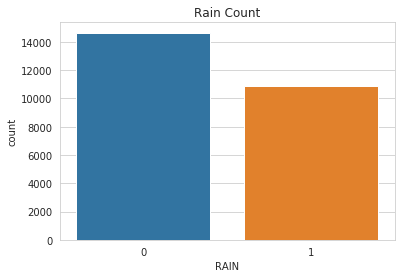

In [164]:
#Visualization rainy days
sns.countplot(x='RAIN',data=df)
plt.title('Rain Count')
plt.show()

<Figure size 1440x576 with 0 Axes>

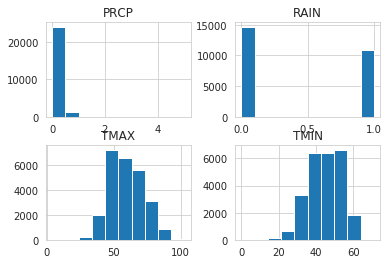

In [181]:
#Histogram of Dataset
plt.figure(figsize=(20,8))
df.hist(bins=10)
plt.show()

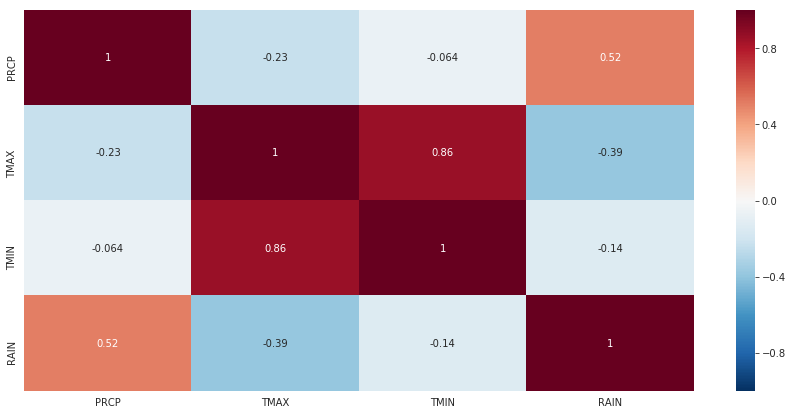

In [182]:
#Correlation with Heatmap
correlation = df.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [183]:
df.corr()

,PRCP,TMAX,TMIN,RAIN
PRCP,1.000000,-0.226765,-0.064404,0.515177
TMAX,-0.226765,1.000000,0.860684,-0.389287
TMIN,-0.064404,0.860684,1.000000,-0.139975
RAIN,0.515177,-0.389287,-0.139975,1.000000


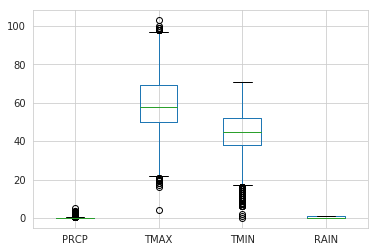

In [184]:
#Boxplot of Whole dataset
df.boxplot( )

[Text(0, 0.5, 'PRCP'),
 Text(0.5, 0, 'RAIN'),
 Text(0.5, 1.0, 'RAIN vs PRCP BoxPlot')]

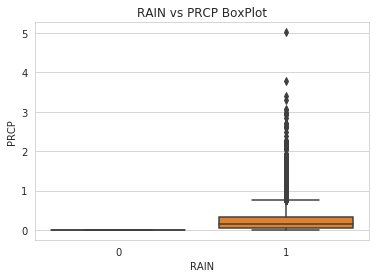

In [185]:
#'RAIN vs PRCP BoxPlot
bxplt = sns.boxplot(x="RAIN", y='PRCP', data = df)
bxplt.set(xlabel='RAIN', ylabel='PRCP', title='RAIN vs PRCP BoxPlot')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


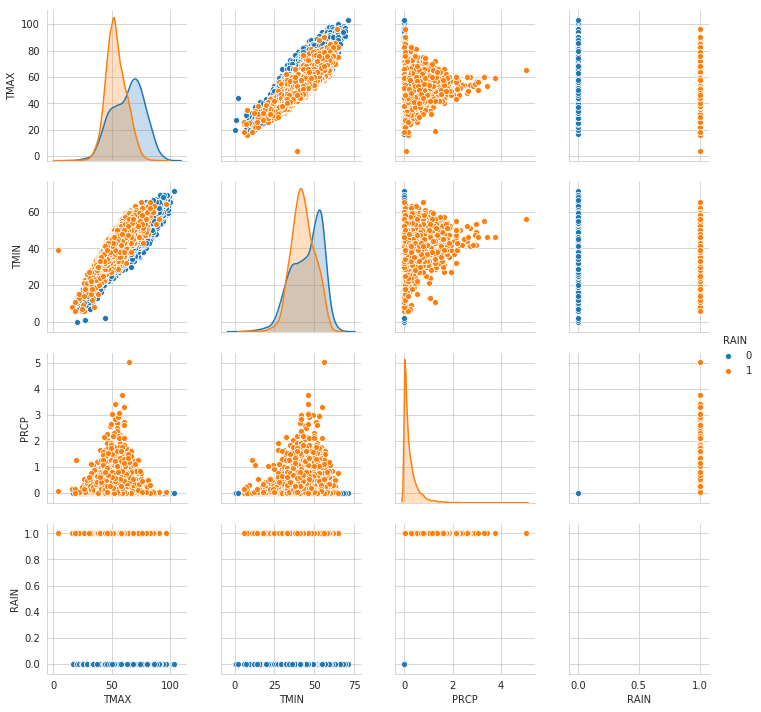

In [186]:
#Pair Plot of the Dataset
import seaborn as sns
sns.pairplot(df[['TMAX', 'TMIN', 'PRCP','RAIN']], hue="RAIN")


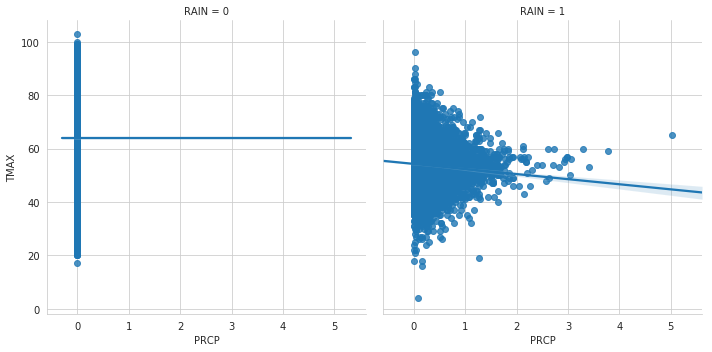

In [187]:
sns.lmplot(x = "PRCP", y = "TMAX", col = "RAIN", data = df)

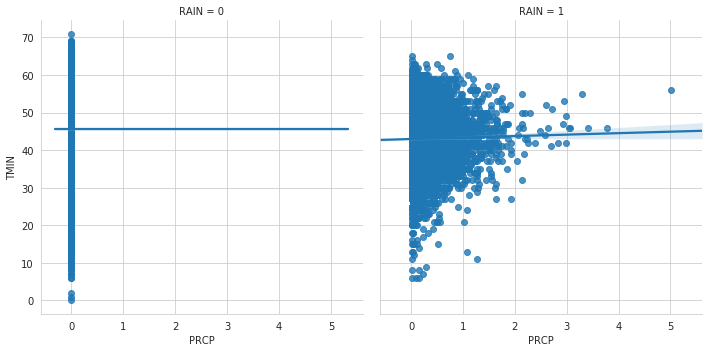

In [188]:
sns.lmplot(x = "PRCP", y = "TMIN", col = "RAIN", data = df)

# Machine Learning-(Supervised & Classification)- Let's Predict the Rain

In [0]:
#Split the data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)


In [0]:
#Defining Features & Label
x = df[['TMAX', 'TMIN', 'PRCP']]
y = df['RAIN']



 <img src="https://raw.githubusercontent.com/fazlyrabbi77/Climate-Science/master/test-train.webp">

# Prediction Model 1- Logistic Regression Model

In [268]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [219]:

#Model performance Report
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)
 
predictions = logreg.predict(x_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Coefficients: [[-0.16242445  0.17399516 39.91021366]]
Intercept: [0.16349622]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      4365
           1       1.00      0.83      0.91      3301

    accuracy                           0.93      7666
   macro avg       0.94      0.91      0.92      7666
weighted avg       0.93      0.93      0.93      7666

Confusion Matrix:
 [[4355   10]
 [ 556 2745]]
Accuracy Score: 0.9261674928254631
Precision: 0.9963702359346642
Recall: 0.8315661920630112



 <img src="https://github.com/fazlyrabbi77/Climate-Science/blob/master/confusion%20matrix.png?raw=true">
    

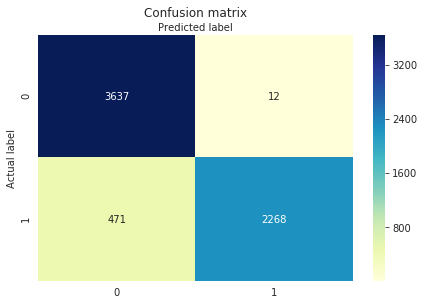

In [194]:
#visualizing Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

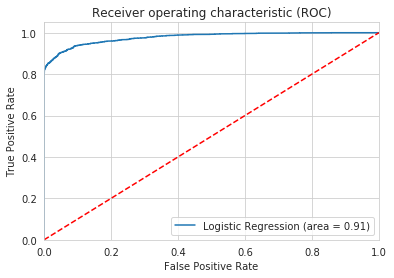

In [195]:

#Visualizing RoC Graph
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

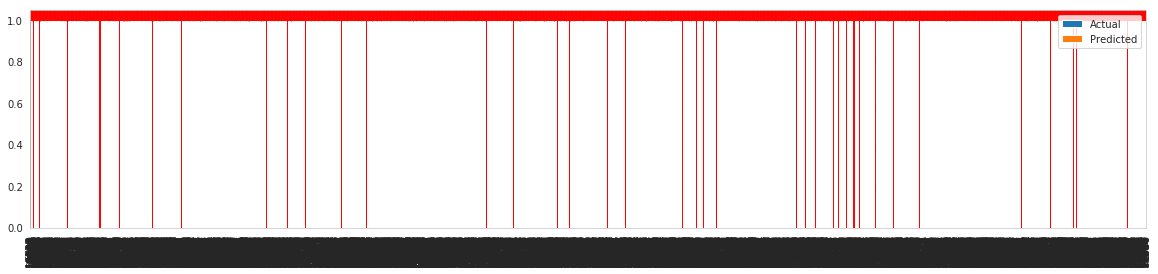

In [199]:
df2.plot(kind='bar',figsize=(20,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Prediction Model 2- Classification & Regression Tree (CART) Model

In [0]:
# Creating the model
#Split the data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=5)
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(x_train, y_train)

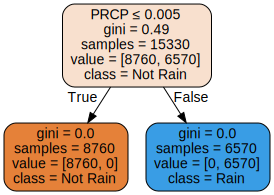

In [231]:
#Visualizing the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=5, feature_names=x.columns, class_names=['Not Rain','Rain'],filled=True, rounded=True, special_characters=True)
valgTre = graphviz.Source(dot_data) 
valgTre

In [235]:
#Model Performance
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
predictions = clf.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5891
           1       1.00      1.00      1.00      4330

    accuracy                           1.00     10221
   macro avg       1.00      1.00      1.00     10221
weighted avg       1.00      1.00      1.00     10221


Accuracy: 1.0000
Confusion Matrix:
 [[5891    0]
 [   0 4330]]


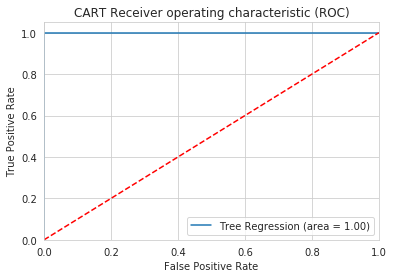

In [236]:
cart_roc_auc = roc_auc_score(y_test, clf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Tree Regression (area = %0.2f)' % cart_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CART Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# Prediction Model 3 - Random Forest Model

In [226]:
#Creating the model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [237]:
#Model Performance
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5891
           1       1.00      1.00      1.00      4330

    accuracy                           1.00     10221
   macro avg       1.00      1.00      1.00     10221
weighted avg       1.00      1.00      1.00     10221


Accuracy: 1.0000
Confusion Matrix:
 [[5891    0]
 [   0 4330]]


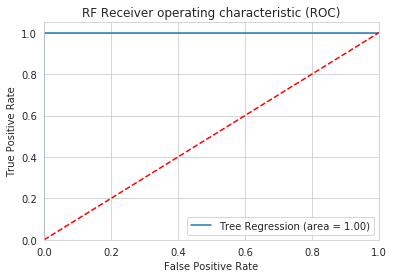

In [238]:
#Ploting ROC
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Tree Regression (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()


# Prediction Model 4 - Support Vector Machine (SVM)

In [246]:
#Creating The Model
svmm = svm.SVC()
svmm.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [248]:
#Model Performance
pred=svmm.predict(x_test)
print(classification_report(y_test, pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))
print(confusion_matrix(y_test,pred))


              precision    recall  f1-score   support

           0       0.82      0.85      0.83      5891
           1       0.79      0.74      0.76      4330

    accuracy                           0.81     10221
   macro avg       0.80      0.80      0.80     10221
weighted avg       0.80      0.81      0.80     10221


Accuracy: 0.8055
[[5023  868]
 [1120 3210]]


# Prediction Model 5 - K Nearest Neighbor (KNN) Model

In [256]:
#Creating the model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [257]:
#Model Performance
pred=knn.predict(x_test)
print(classification_report(y_test, pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5891
           1       0.97      0.84      0.90      4330

    accuracy                           0.92     10221
   macro avg       0.93      0.91      0.92     10221
weighted avg       0.92      0.92      0.92     10221


Accuracy: 0.9189
[[5765  126]
 [ 703 3627]]


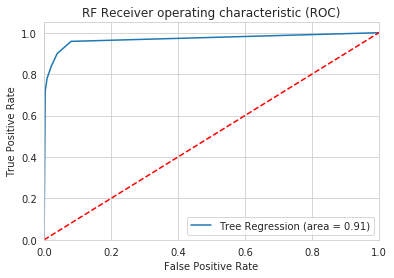

In [258]:
#Ploting ROC
rf_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Tree Regression (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()
